# Machine Learning HW2 Simulation Part (1st exercise)
## Amirmahdi Ansaripour (810198358)

In this exercise, it is asked to fit a regression model on some random points to which some noise is added. The question is done in two parts, in which Guassian and Poisson noises are added respectively. 

In [16]:
import numpy as np
import math
import random
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
pi = math.pi
cos = math.cos


In [17]:
X = np.arange(-10, 10, 0.2)
Y = [((2 * cos(x)/(-1 * pi)) + (x / pi) + (2 * cos(3*x)/(-1 * 3 * pi))) for x in X]
guassian_noise = np.random.normal(0, 1, size = len(X))
poisson_noise = np.random.poisson(lam = 2, size = len(X))

Y_guassian_noised = [0] * len(Y)
Y_poisson_noised = [0] * len(Y)

for i in range(len(Y)):
    Y_guassian_noised[i] = Y[i] + (0.1 * guassian_noise[i])
    Y_poisson_noised[i] = Y[i] + (0.1 * poisson_noise[i])    

In [18]:
def split_into_test_and_train(X, Y, rate):
    X_train, Y_train, X_test, Y_test = [], [], [], []
    indexes = []
    random.seed(0)
    indexes = random.choices(np.arange(0, len(Y) - 1, 1), k = int(math.floor(rate*len(Y))))
#     print(indexes)
    for j in range(len(Y)):
        if j in indexes:
            X_test.append(X[j])
            Y_test.append(Y[j])
        else:
            X_train.append(X[j])
            Y_train.append(Y[j])
    
    return X_train, Y_train, X_test, Y_test

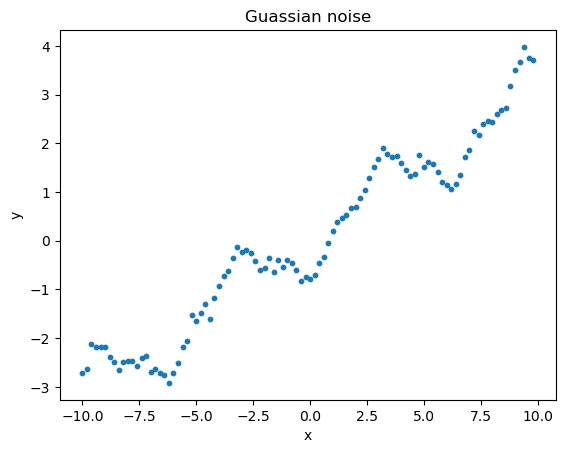

In [19]:
plt.title("Guassian noise")
plt.xlabel('x')
plt.ylabel('y')
plt.scatter(X, Y_guassian_noised, 10)
plt.show()

In [20]:
def fitRegression(degree_, X_train, Y_train):
    Phi_convert = PolynomialFeatures(degree=degree_)
    X_train = np.asarray(X_train)
    x_poly = Phi_convert.fit_transform(X_train[:, np.newaxis])
    model = LinearRegression()
    model.fit(x_poly, Y_train)
    curve = model.predict(x_poly)
    return model, curve

def test(model, X_test, degree_):
    Phi_convert = PolynomialFeatures(degree=degree_)
    X_test = np.asarray(X_test)
    x_poly = Phi_convert.fit_transform(X_test[:, np.newaxis])
    y_pred = model.predict(x_poly)
    return y_pred

def calc_bias_and_mse(train_pred, train_actual, test_pred, test_actual):
    bias, mse, error = 0, 0, 0
    for i in range(len(train_pred)):
        bias += pow((train_pred[i] - train_actual[i]), 2)
    for i in range(len(test_pred)):
        mse += pow((test_pred[i] - test_actual[i]), 2)
    bias = bias / len(train_pred)
    mse = mse / len(test_pred)
    error = bias + mse
    print("Bias: ", bias)
    print("MSE: ", mse)
    print("Error: ", error)
    return bias, mse, error

def plot_bias_mse(axis, bias, variance):
    plt.plot(axis, bias, 'orange')
    plt.plot(axis, variance, 'blue')
    plt.xticks(axis)
    plt.legend(("Bias", "Variance"))
    plt.show()



## Ouputs of the first case (Gaussian noise)



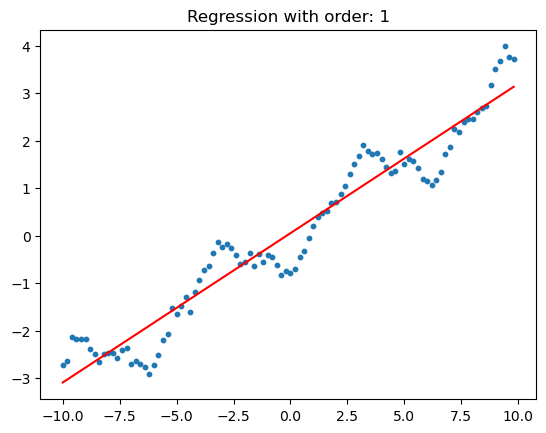

Bias:  0.25431167461473986
MSE:  0.17886832777218734
Error:  0.4331800023869272


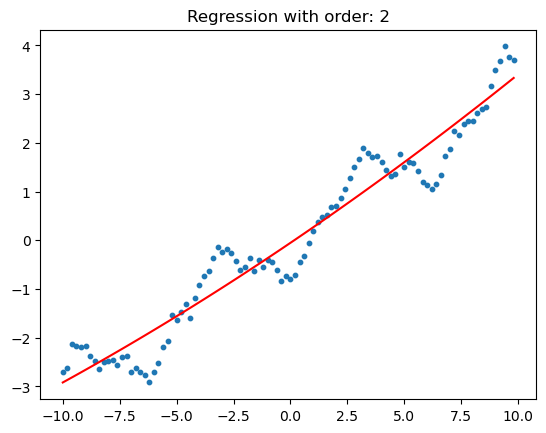

Bias:  0.24626473029205018
MSE:  0.15833294622923855
Error:  0.40459767652128875


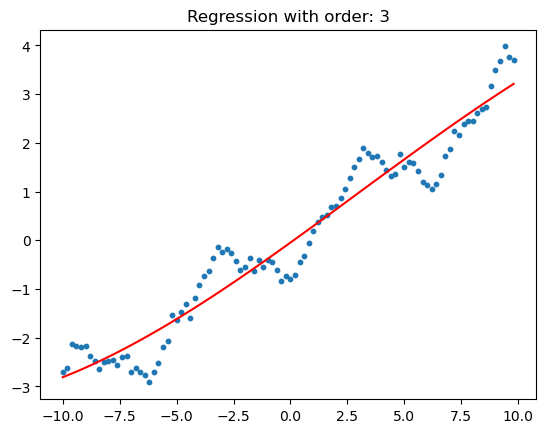

Bias:  0.24382152558837303
MSE:  0.17163556262648122
Error:  0.4154570882148543


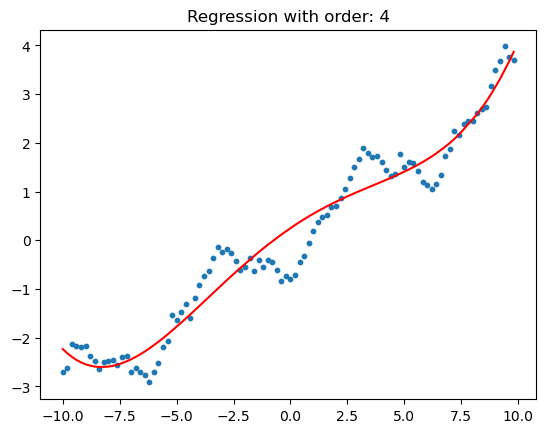

Bias:  0.18146739347853966
MSE:  0.17335250198057134
Error:  0.35481989545911097


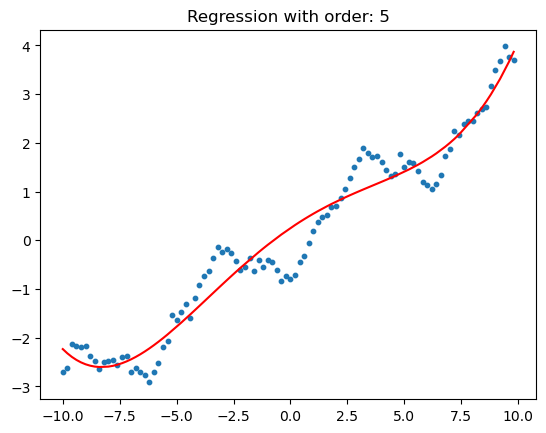

Bias:  0.18146738926754652
MSE:  0.17336029710672543
Error:  0.354827686374272


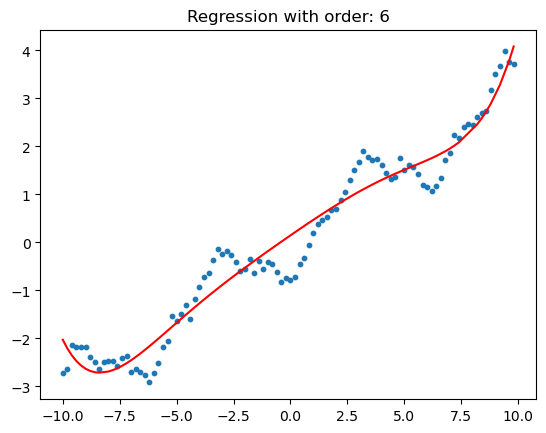

Bias:  0.17474233655493313
MSE:  0.1432432687617747
Error:  0.31798560531670783


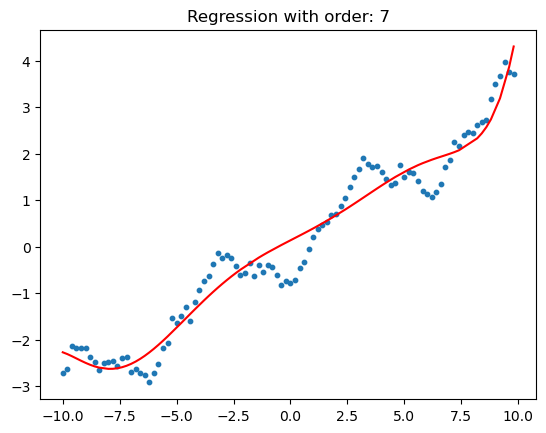

Bias:  0.1661205977966303
MSE:  0.16881735012187746
Error:  0.33493794791850773


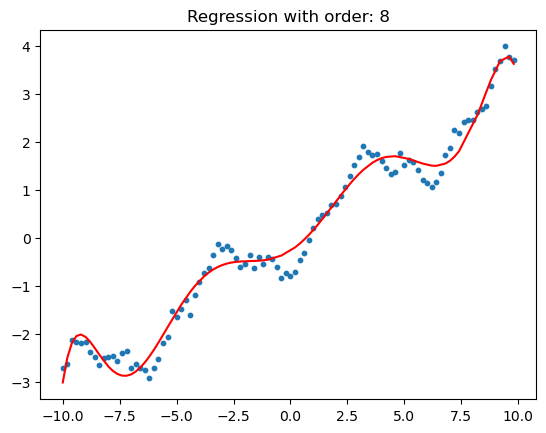

Bias:  0.06887079301141584
MSE:  0.05095524400735768
Error:  0.11982603701877352


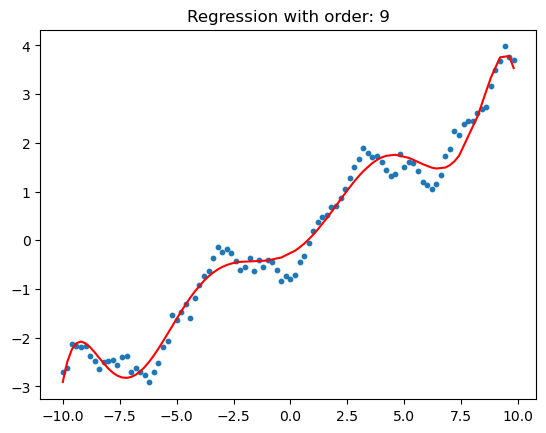

Bias:  0.06700591663537704
MSE:  0.05844153388214678
Error:  0.12544745051752382


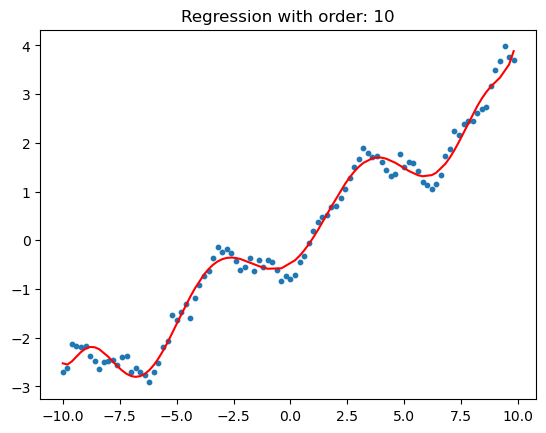

Bias:  0.03637989773801807
MSE:  0.041361602654028405
Error:  0.07774150039204647


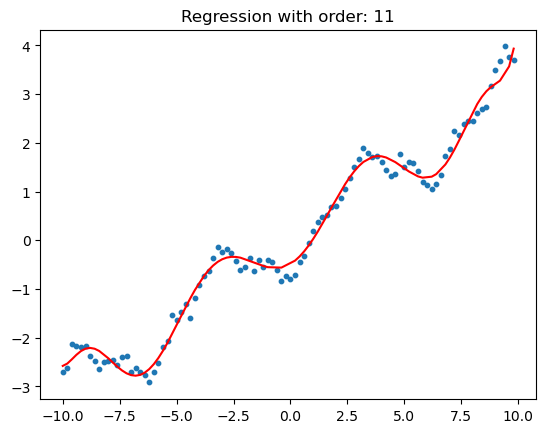

Bias:  0.03572490786778727
MSE:  0.0453207051270017
Error:  0.08104561299478896


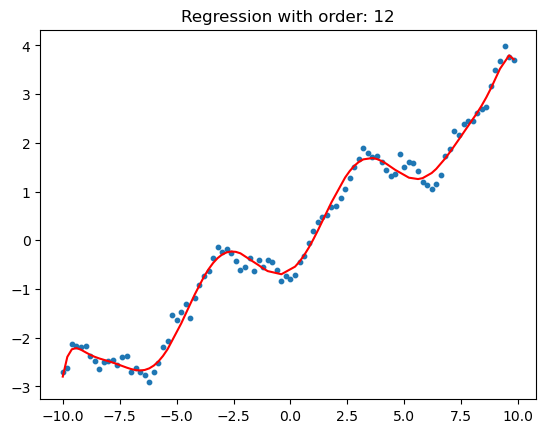

Bias:  0.023137806672774965
MSE:  0.0484728219000565
Error:  0.07161062857283146


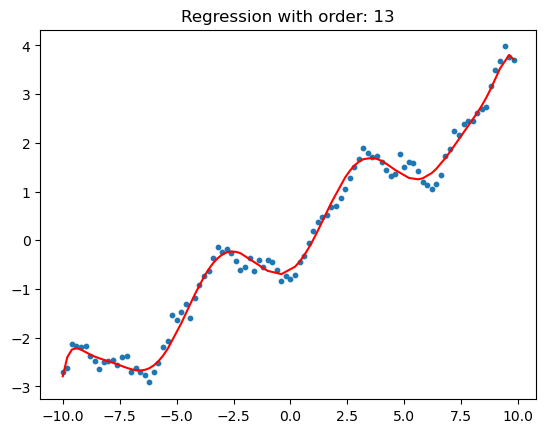

Bias:  0.02312413435489016
MSE:  0.04835978492529166
Error:  0.07148391928018182


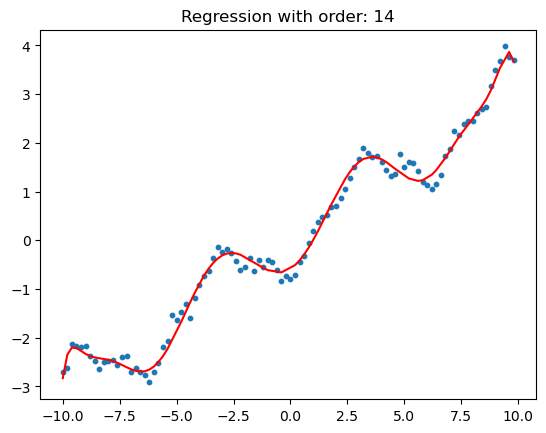

Bias:  0.02238508114008328
MSE:  0.04377027810748712
Error:  0.0661553592475704


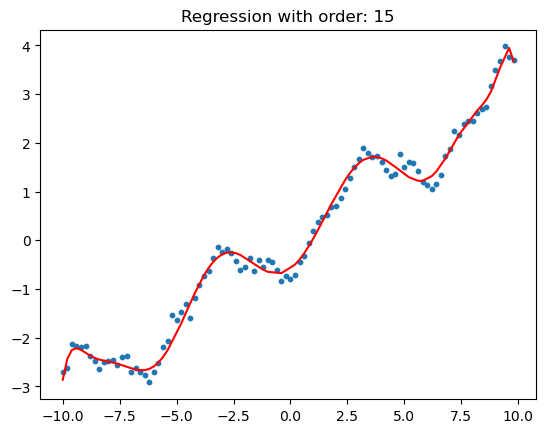

Bias:  0.021897105345615623
MSE:  0.043522928068840186
Error:  0.0654200334144558


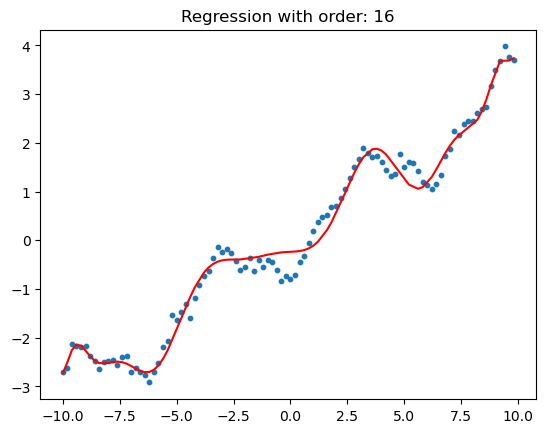

Bias:  0.03950790295057795
MSE:  0.07847280917907001
Error:  0.11798071212964796


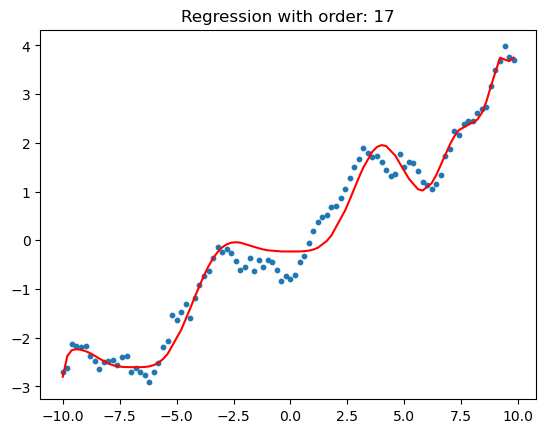

Bias:  0.07036244172837725
MSE:  0.12544601918007295
Error:  0.1958084609084502


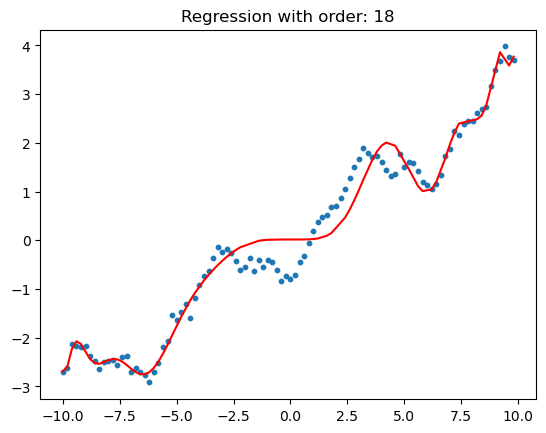

Bias:  0.09465514397034064
MSE:  0.15272537881807846
Error:  0.2473805227884191


In [21]:
X_train, Y_guassian_train, X_test, Y_guassian_test = split_into_test_and_train(X, Y_guassian_noised, 0.3)

bias_set_g = []
variance_set_g = []
error_set_g = []
for i in range(1, 19):
    model, curve = fitRegression(i, X_train, Y_guassian_train)
    y_pred = test(model, X_test, i)
    plt.scatter(X, Y_guassian_noised, 10)
    plt.plot(X_train, curve, color = 'r')
    plt.title("Regression with order: " + str(i))
    plt.show()
    bias, variance, error = calc_bias_and_mse(curve, Y_guassian_train, y_pred, Y_guassian_test)
    bias_set_g.append(bias)
    variance_set_g.append(variance)
    error_set_g.append(error)


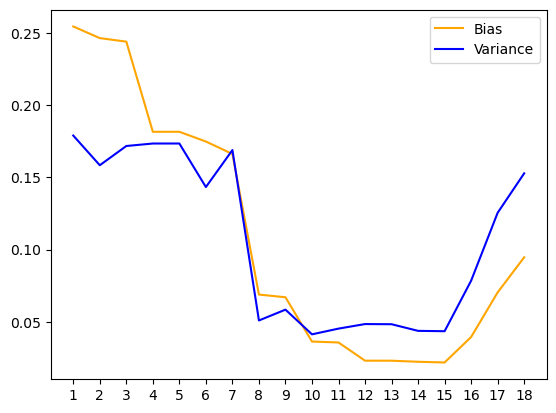

The best degree for regression:  15
The worst degree for regression:  1


In [22]:
plot_bias_mse([a for a in range(1, 19)], bias_set_g, variance_set_g)
print("The best degree for regression: ", error_set_g.index(min(error_set_g)) + 1)
print("The worst degree for regression: ", error_set_g.index(max(error_set_g)) + 1)

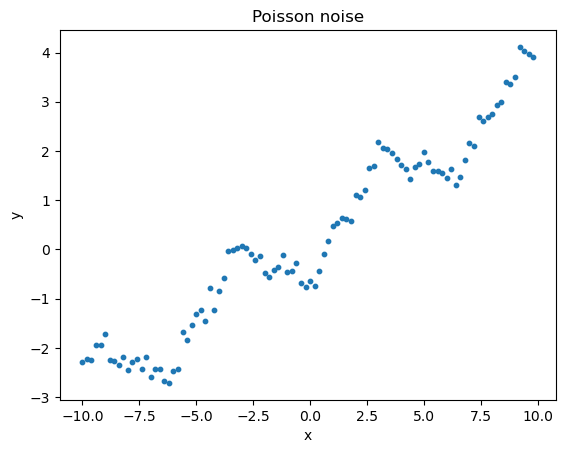

In [23]:
plt.title("Poisson noise")
plt.xlabel('x')
plt.ylabel('y')
plt.scatter(X, Y_poisson_noised, 10)
plt.show()

## Outputs of the second case (Poisson noise is added)

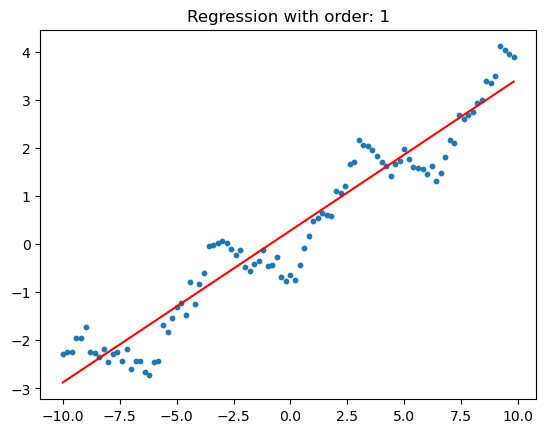

Bias:  0.29503675444297744
MSE:  0.19789712011678662
Error:  0.49293387455976406


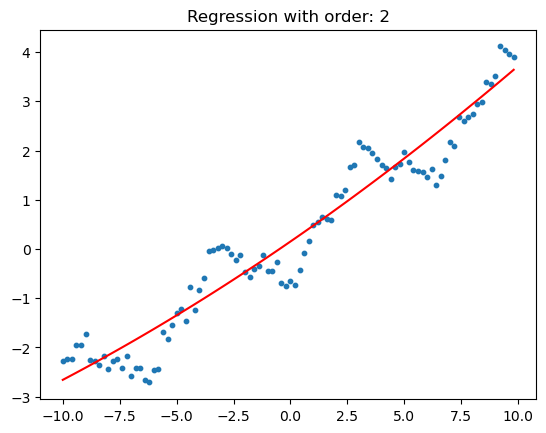

Bias:  0.28190040505966824
MSE:  0.16723115944964745
Error:  0.4491315645093157


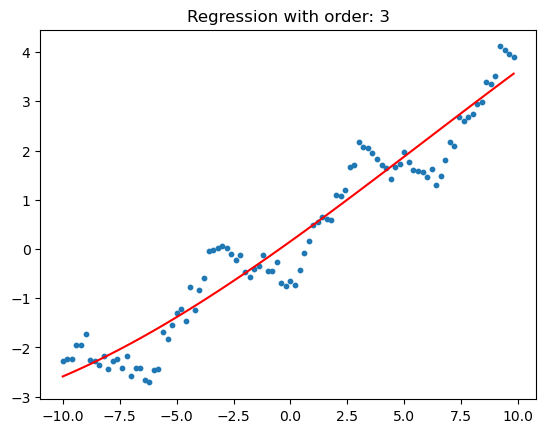

Bias:  0.2808895831115286
MSE:  0.17176457235881018
Error:  0.4526541554703388


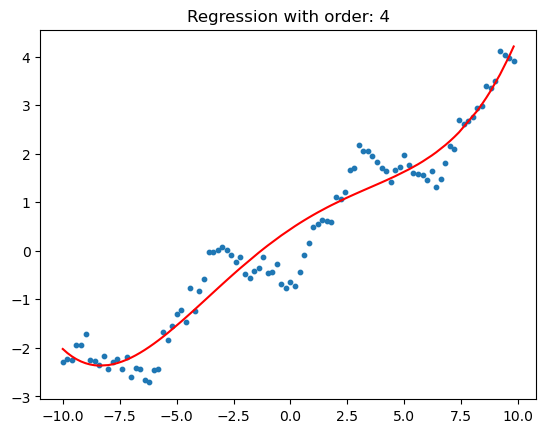

Bias:  0.22074810987027155
MSE:  0.18715506421121747
Error:  0.407903174081489


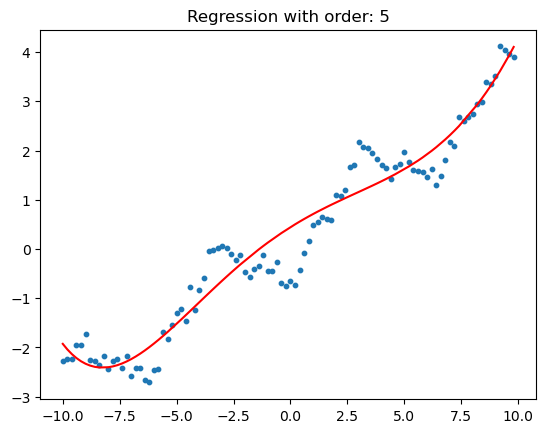

Bias:  0.21918761795103578
MSE:  0.1967273481513683
Error:  0.4159149661024041


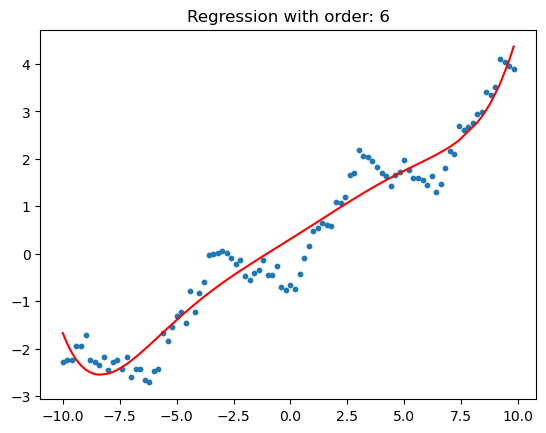

Bias:  0.20865332608014492
MSE:  0.16075697953295112
Error:  0.36941030561309607


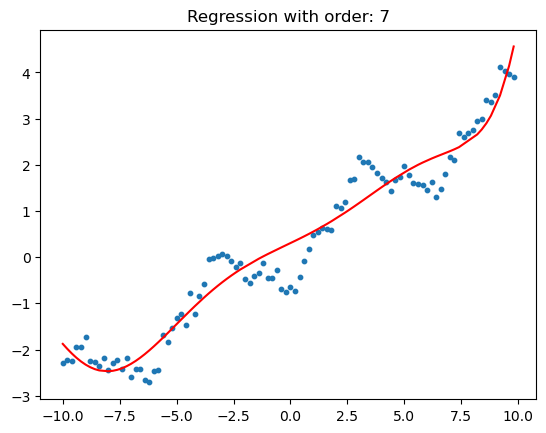

Bias:  0.20241127521749513
MSE:  0.1843423055048929
Error:  0.386753580722388


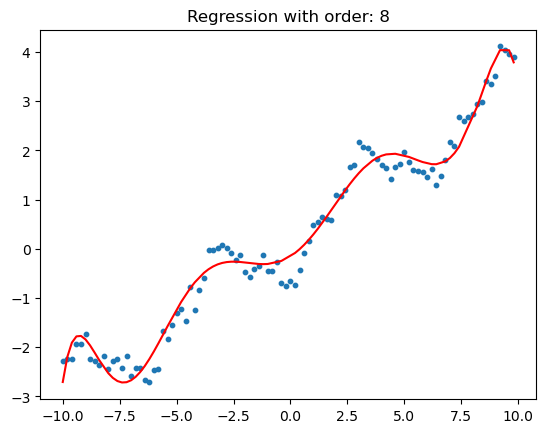

Bias:  0.08092786407701831
MSE:  0.07938636397810427
Error:  0.16031422805512258


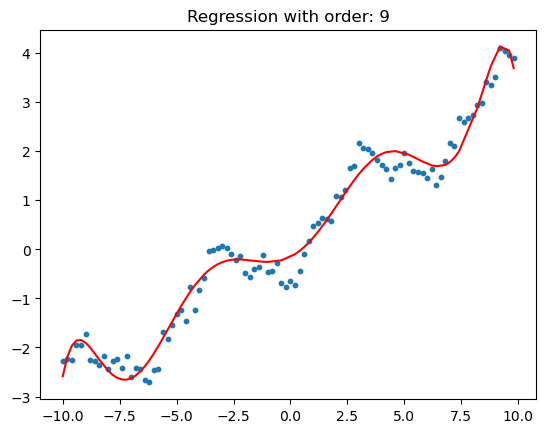

Bias:  0.07832059938041905
MSE:  0.0915970003578664
Error:  0.16991759973828546


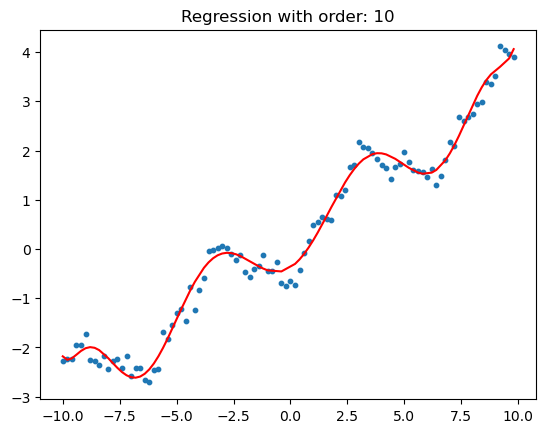

Bias:  0.0445118550315912
MSE:  0.046868206028519946
Error:  0.09138006106011115


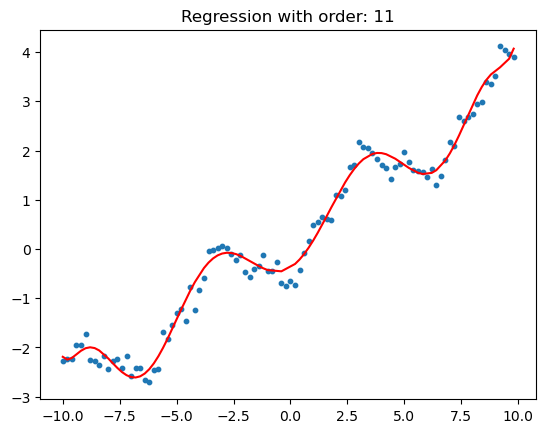

Bias:  0.04449215068027695
MSE:  0.04718771258002725
Error:  0.0916798632603042


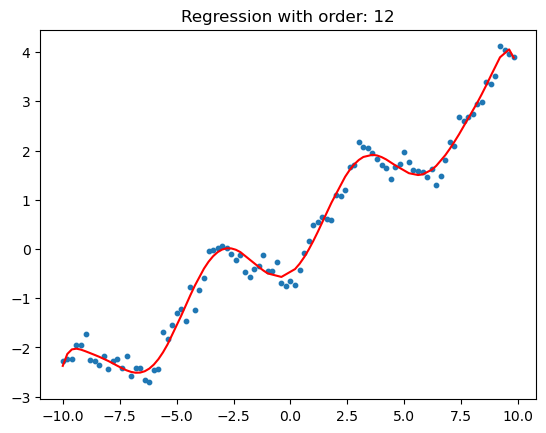

Bias:  0.03562408352714623
MSE:  0.04698277108393754
Error:  0.08260685461108377


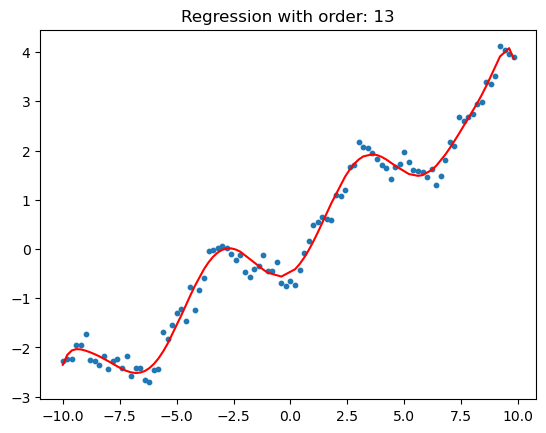

Bias:  0.035488042531357906
MSE:  0.04756178055147176
Error:  0.08304982308282967


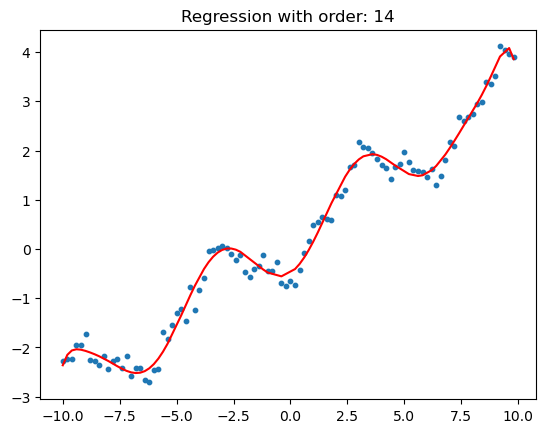

Bias:  0.03548211640390906
MSE:  0.047432567381338
Error:  0.08291468378524705


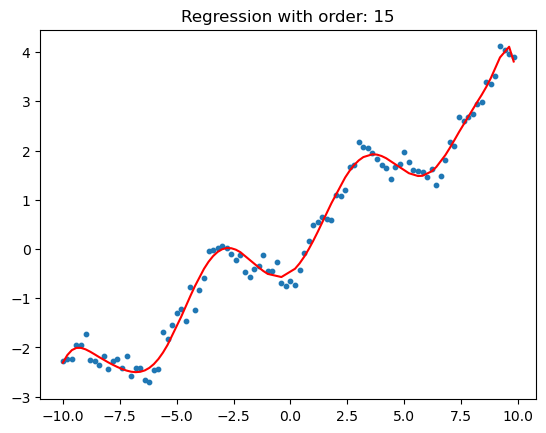

Bias:  0.03521151725578735
MSE:  0.04574727994447221
Error:  0.08095879720025956


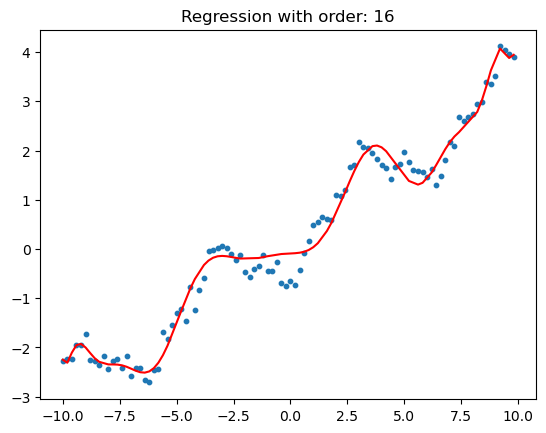

Bias:  0.056102279056853506
MSE:  0.10471833057276828
Error:  0.16082060962962177


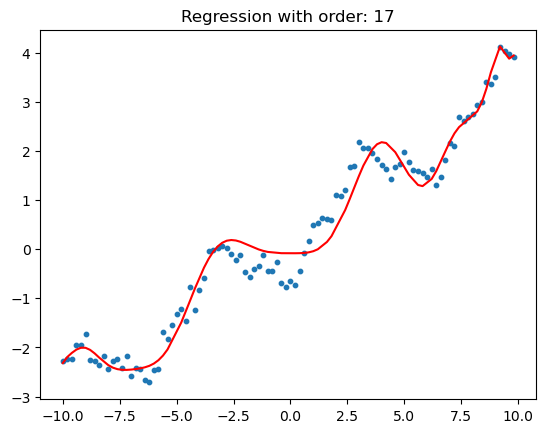

Bias:  0.08819834574853976
MSE:  0.15711401517903706
Error:  0.2453123609275768


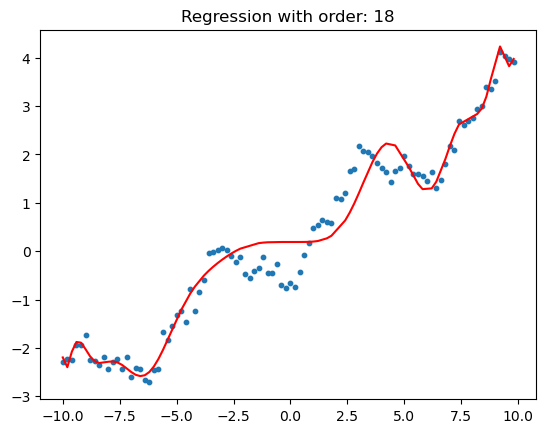

Bias:  0.12130105295978162
MSE:  0.21720166965614562
Error:  0.33850272261592723


In [24]:
X_train, Y_poisson_train, X_test, Y_poisson_test = split_into_test_and_train(X, Y_poisson_noised, 0.3)

bias_set_p = []
variance_set_p = []
error_set_p = []

for i in range(1, 19):
    model, curve = fitRegression(i, X_train, Y_poisson_train)
    y_pred = test(model, X_test, i)
    plt.scatter(X, Y_poisson_noised, 10)
    plt.plot(X_train, curve, color = 'r')
    plt.title("Regression with order: " + str(i))
    plt.show()
    bias, variance, error = calc_bias_and_mse(curve, Y_poisson_train, y_pred, Y_poisson_test)
    bias_set_p.append(bias)
    variance_set_p.append(variance)
    error_set_p.append(error)

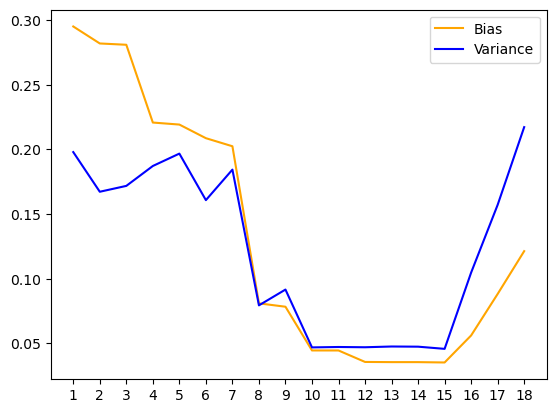

The best degree for regression:  15
The worst degree for regression:  1


In [25]:
plot_bias_mse([a for a in range(1, 19)], bias_set_p, variance_set_p)
print("The best degree for regression: ", error_set_p.index(min(error_set_p)) + 1)
print("The worst degree for regression: ", error_set_p.index(max(error_set_p)) + 1)


## Output analysis (Part C)

The basic formula based on which the model is evaluated is:
$$ Error = bias + variance $$

$$ bias = {\sum_{y_{i}\epsilon train}(y_{i} \space - \space \hat{y_{i}})^2} $$
$$ variance = {\sum_{y_{i}\epsilon test}(y_{i} \space - \space \hat{y_{i}})^2} $$


Where bias and variance are error values of train and test sets respectively. Based on the graphs showing regressions and those showing bias and variance for different degrees, we can conclude the follwing points:

1) Regression models with low degrees are underfitted, since they have high bias error. 

2) Regression models with degrees higher than 14 are overfitted, since they have high variance error.